In [ ]:
# Importação das bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configurações para melhor visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/lelet2/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carregando o dataset de exemplo
df = pd.read_csv(path+'funcionarios_empresa.csv')
# Exibindo as primeiras linhas
print("Primeiras 5 linhas do dataset:")
print(df.head())

print("\n" + "="*50)
print("Informações gerais do dataset:")
print(df.info())

print("\n" + "="*50)
print("Dimensões do dataset:")
print(f"Linhas: {df.shape[0]}, Colunas: {df.shape[1]}")

Primeiras 5 linhas do dataset:
   ID_Funcionario                Nome  Idade Departamento  \
0               1  Tatiane Mendes 001     40       Vendas   
1               2       Ana Silva 002     23    Marketing   
2               3    Rafael Alves 003     36           TI   
3               4     Carla Souza 004     32    Operações   
4               5     Pedro Costa 005     33   Financeiro   

                      Cargo  Salario  Tempo_Empresa_Meses Data_Admissao  \
0               Vendedor Jr  3685.36                    4    2025-05-18   
1  Coordenador de Marketing  8081.03                    1    2025-08-16   
2       Desenvolvedor Pleno  8491.98                    2    2025-07-17   
3      Gerente de Operações  9745.30                    9    2024-12-19   
4    Analista Financeiro Jr  3556.68                   63    2020-07-13   

      Nivel_Educacao Estado_Civil Tipo_Contrato  Avaliacao_Performance  \
0  Superior Completo    Casado(a)           CLT                    4.8   
1  

In [ ]:
# Estatísticas descritivas básicas
print("Estatísticas descritivas para variáveis numéricas:")
print(df.describe())

print("\n" + "="*50)
print("Estatísticas descritivas para variáveis categóricas:")
print(df.describe(include=['object']))

Estatísticas descritivas para variáveis numéricas:
       ID_Funcionario       Idade       Salario  Tempo_Empresa_Meses  \
count      500.000000  500.000000    500.000000            500.00000   
mean       250.500000   35.764000   7780.120720             21.79600   
std        144.481833    9.610673   4108.494711             22.63234   
min          1.000000   19.000000   1170.990000              1.00000   
25%        125.750000   29.000000   4446.787500              5.00000   
50%        250.500000   35.000000   7167.265000             14.00000   
75%        375.250000   41.000000   9846.422500             30.00000   
max        500.000000   67.000000  37988.030000            120.00000   

       Avaliacao_Performance  Horas_Extras_Mes   Beneficios  \
count             475.000000        500.000000   490.000000   
mean                3.427368         10.370000   811.200224   
std                 0.765589         11.298159   210.466584   
min                 1.000000          0.000000  

In [ ]:
# Calculando medidas de tendência central para a coluna 'Preco'
if 'Salario' in df.columns:
    salario = df['Salario'].dropna()

    print("Medidas de Tendência Central para Salario:")
    print(f"Média: R$ {salario.mean():.2f}")
    print(f"Mediana: R$ {salario.median():.2f}")
    print(f"Moda: R$ {salario.mode().iloc[0]:.2f}")

    # Média aparada (trimmed mean) - remove 10% dos valores extremos
    media_aparada = stats.trim_mean(salario, 0.1)
    print(f"Média Aparada (10%): R$ {media_aparada:.2f}")
else:
    print("Coluna 'Salario' não encontrada no dataset")

Medidas de Tendência Central para Salario:
Média: R$ 7780.12
Mediana: R$ 7167.26
Moda: R$ 8823.26
Média Aparada (10%): R$ 7370.74


In [ ]:
# Calculando medidas de dispersão
if 'Salario' in df.columns:
    salario = df['Salario'].dropna()

    print("Medidas de Dispersão para Preço:")
    print(f"Variância: {salario.var():.2f}")
    print(f"Desvio Padrão: R$ {salario.std():.2f}")
    print(f"Amplitude: R$ {salario.max() - salario.min():.2f}")

    # Quartis e IQR
    Q1 = salario.quantile(0.25)
    Q2 = salario.quantile(0.50)  # Mediana
    Q3 = salario.quantile(0.75)
    IQR = Q3 - Q1

    print(f"\nQuartis:")
    print(f"Q1 (25%): R$ {Q1:.2f}")
    print(f"Q2 (50% - Mediana): R$ {Q2:.2f}")
    print(f"Q3 (75%): R$ {Q3:.2f}")
    print(f"IQR (Intervalo Interquartil): R$ {IQR:.2f}")

    # Coeficiente de variação
    cv = (salario.std() / salario.mean()) * 100
    print(f"\nCoeficiente de Variação: {cv:.2f}%")
else:
    print("Coluna 'salario' não encontrada no dataset")

Medidas de Dispersão para Preço:
Variância: 16879728.79
Desvio Padrão: R$ 4108.49
Amplitude: R$ 36817.04

Quartis:
Q1 (25%): R$ 4446.79
Q2 (50% - Mediana): R$ 7167.26
Q3 (75%): R$ 9846.42
IQR (Intervalo Interquartil): R$ 5399.64

Coeficiente de Variação: 52.81%


In [ ]:
# Análise da distribuição dos dados
if 'salario' in df.columns:
    salario = df['salario'].dropna()

    # Assimetria (skewness) e curtose (kurtosis)
    assimetria = salario.skew()
    curtose = salario.kurtosis()

    print("Análise da Distribuição:")
    print(f"Assimetria (Skewness): {assimetria:.3f}")
    if assimetria > 0:
        print("  → Distribuição assimétrica à direita (cauda longa à direita)")
    elif assimetria < 0:
        print("  → Distribuição assimétrica à esquerda (cauda longa à esquerda)")
    else:
        print("  → Distribuição simétrica")

    print(f"\nCurtose: {curtose:.3f}")
    if curtose > 0:
        print("  → Distribuição leptocúrtica (mais pontiaguda que a normal)")
    elif curtose < 0:
        print("  → Distribuição platicúrtica (mais achatada que a normal)")
    else:
        print("  → Distribuição mesocúrtica (similar à normal)")
else:
    print("Coluna 'salario' não encontrada no dataset")

Coluna 'salario' não encontrada no dataset


In [ ]:
# Criando visualizações para as estatísticas descritivas
if 'salario' in df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Histograma
    axes[0, 0].hist(df['Preço'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].axvline(df['Preço'].mean(), color='red', linestyle='--', label=f'Média: R$ {df["Preço"].mean():.2f}')
    axes[0, 0].axvline(df['Preço'].median(), color='green', linestyle='--', label=f'Mediana: R$ {df["Preço"].median():.2f}')
    axes[0, 0].set_title('Distribuição de salario')
    axes[0, 0].set_xlabel('Preço (R$)')
    axes[0, 0].set_ylabel('Frequência')
    axes[0, 0].legend()

    # Boxplot
    axes[0, 1].boxplot(df['Preço'].dropna())
    axes[0, 1].set_title('Boxplot de Preços')
    axes[0, 1].set_ylabel('Preço (R$)')

    # Q-Q Plot para verificar normalidade
    stats.probplot(df['Preço'].dropna(), dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title('Q-Q Plot (Teste de Normalidade)')

    # Densidade
    df['Preço'].dropna().plot(kind='density', ax=axes[1, 1], color='purple')
    axes[1, 1].set_title('Densidade de Preços')
    axes[1, 1].set_xlabel('Preço (R$)')

    plt.tight_layout()
    plt.show()
else:
    print("Coluna 'salario' não encontrada no dataset")

Coluna 'salario' não encontrada no dataset


In [ ]:
# Verificando os tipos de dados atuais
print("Tipos de dados atuais:")
print(df.dtypes)

print("\n" + "="*50)
print("Informações detalhadas sobre os tipos:")
for coluna in df.columns:
    tipo = df[coluna].dtype
    valores_unicos = df[coluna].nunique()
    valores_nulos = df[coluna].isnull().sum()

    print(f"{coluna}:")
    print(f"  Tipo: {tipo}")
    print(f"  Valores únicos: {valores_unicos}")
    print(f"  Valores nulos: {valores_nulos}")
    print()

Tipos de dados atuais:
ID_Funcionario             int64
Nome                      object
Idade                      int64
Departamento              object
Cargo                     object
Salario                  float64
Tempo_Empresa_Meses        int64
Data_Admissao             object
Nivel_Educacao            object
Estado_Civil              object
Tipo_Contrato             object
Avaliacao_Performance    float64
Horas_Extras_Mes           int64
Beneficios               float64
Faltas_Ultimo_Ano          int64
Satisfacao_Trabalho      float64
dtype: object

Informações detalhadas sobre os tipos:
ID_Funcionario:
  Tipo: int64
  Valores únicos: 500
  Valores nulos: 0

Nome:
  Tipo: object
  Valores únicos: 500
  Valores nulos: 0

Idade:
  Tipo: int64
  Valores únicos: 39
  Valores nulos: 0

Departamento:
  Tipo: object
  Valores únicos: 7
  Valores nulos: 0

Cargo:
  Tipo: object
  Valores únicos: 31
  Valores nulos: 0

Salario:
  Tipo: float64
  Valores únicos: 498
  Valores nulos: 0


In [ ]:
# Exemplo de conversões de tipos de dados
df_convertido = df.copy()

# Convertendo data para datetime (se existir coluna de data)
if 'Data_Venda' in df_convertido.columns:
    df_convertido['Data_Venda'] = pd.to_datetime(df_convertido['Data_Venda'], errors='coerce')
    print("Coluna 'Data_Venda' convertida para datetime")

# Convertendo variável booleana (se existir)
if 'Garantia_Estendida' in df_convertido.columns:
    # Mapeamento de strings para booleano
    mapeamento_bool = {'Sim': True, 'Não': False, 'Yes': True, 'No': False}
    df_convertido['Garantia_Estendida'] = df_convertido['Garantia_Estendida'].map(mapeamento_bool)
    print("Coluna 'Garantia_Estendida' convertida para booleano")

# Convertendo para categoria (economiza memória para variáveis categóricas)
if 'Categoria' in df_convertido.columns:
    df_convertido['Categoria'] = df_convertido['Categoria'].astype('category')
    print("Coluna 'Categoria' convertida para tipo categórico")

if 'Forma_Pagamento' in df_convertido.columns:
    df_convertido['Forma_Pagamento'] = df_convertido['Forma_Pagamento'].astype('category')
    print("Coluna 'Forma_Pagamento' convertida para tipo categórico")

print("\n" + "="*50)
print("Tipos de dados após conversão:")
print(df_convertido.dtypes)


Tipos de dados após conversão:
ID_Funcionario             int64
Nome                      object
Idade                      int64
Departamento              object
Cargo                     object
Salario                  float64
Tempo_Empresa_Meses        int64
Data_Admissao             object
Nivel_Educacao            object
Estado_Civil              object
Tipo_Contrato             object
Avaliacao_Performance    float64
Horas_Extras_Mes           int64
Beneficios               float64
Faltas_Ultimo_Ano          int64
Satisfacao_Trabalho      float64
dtype: object


Variáveis Quantitativas encontradas:
- ID_Funcionario
- Idade
- Salario
- Tempo_Empresa_Meses
- Avaliacao_Performance
- Horas_Extras_Mes
- Beneficios
- Faltas_Ultimo_Ano
- Satisfacao_Trabalho

Análise das variáveis quantitativas:

Matriz de Correlação:
                       ID_Funcionario     Idade   Salario  \
ID_Funcionario               1.000000  0.004588 -0.005584   
Idade                        0.004588  1.000000 -0.027766   
Salario                     -0.005584 -0.027766  1.000000   
Tempo_Empresa_Meses          0.027195 -0.049955  0.055770   
Avaliacao_Performance       -0.041242 -0.024573  0.022026   
Horas_Extras_Mes            -0.007281  0.035835  0.042974   
Beneficios                  -0.039368  0.021604  0.056632   
Faltas_Ultimo_Ano            0.049879  0.003842  0.084263   
Satisfacao_Trabalho         -0.023755 -0.004574 -0.067562   

                       Tempo_Empresa_Meses  Avaliacao_Performance  \
ID_Funcionario                    0.027195              -0.041242  

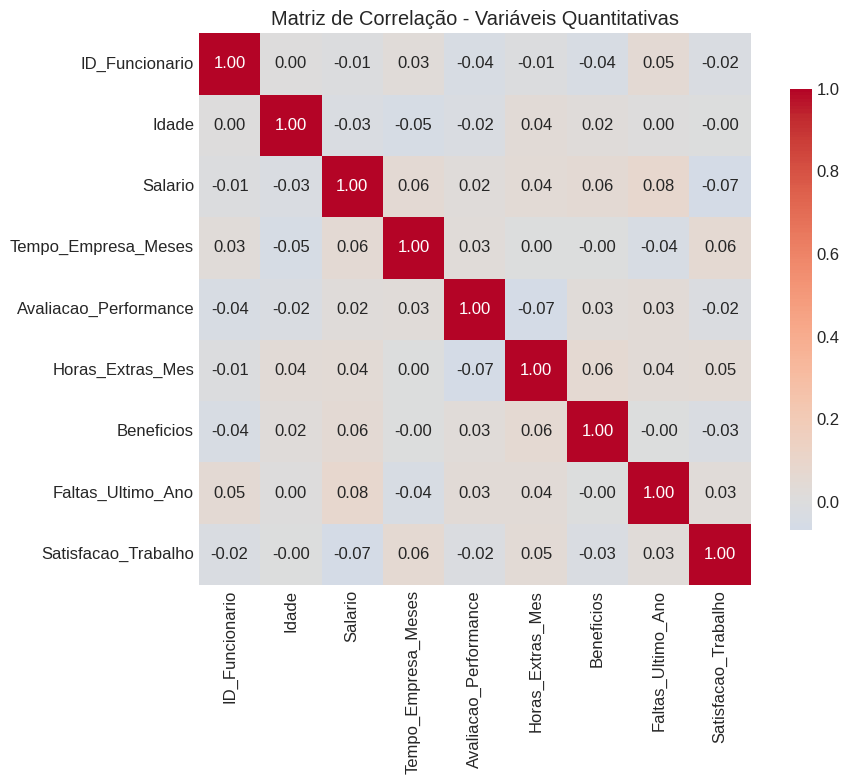

In [ ]:
# Identificando e analisando variáveis quantitativas
colunas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

print("Variáveis Quantitativas encontradas:")
for coluna in colunas_numericas:
    print(f"- {coluna}")

if colunas_numericas:
    print("\n" + "="*50)
    print("Análise das variáveis quantitativas:")

    # Correlação entre variáveis numéricas
    correlacao = df[colunas_numericas].corr()
    print("\nMatriz de Correlação:")
    print(correlacao)

    # Visualização da matriz de correlação
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlacao, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
    plt.title('Matriz de Correlação - Variáveis Quantitativas')
    plt.tight_layout()
    plt.show()
else:
    print("Nenhuma variável quantitativa encontrada")

Variáveis Qualitativas encontradas:
- Nome
- Departamento
- Cargo
- Data_Admissao
- Nivel_Educacao
- Estado_Civil
- Tipo_Contrato

Análise das variáveis qualitativas:

Nome:
                     Contagem  Percentual
Nome                                     
Tatiane Mendes 500          1         0.2
Tatiane Mendes 001          1         0.2
Ana Silva 002               1         0.2
Rafael Alves 003            1         0.2
Larissa Cardoso 484         1         0.2
...                       ...         ...
Rafael Alves 009            1         0.2
Maria Oliveira 008          1         0.2
João Santos 007             1         0.2
Vanessa Castro 006          1         0.2
Pedro Costa 005             1         0.2

[500 rows x 2 columns]

Departamento:
              Contagem  Percentual
Departamento                      
Vendas             111        22.2
TI                 109        21.8
Marketing           78        15.6
Operações           69        13.8
Financeiro          58        1

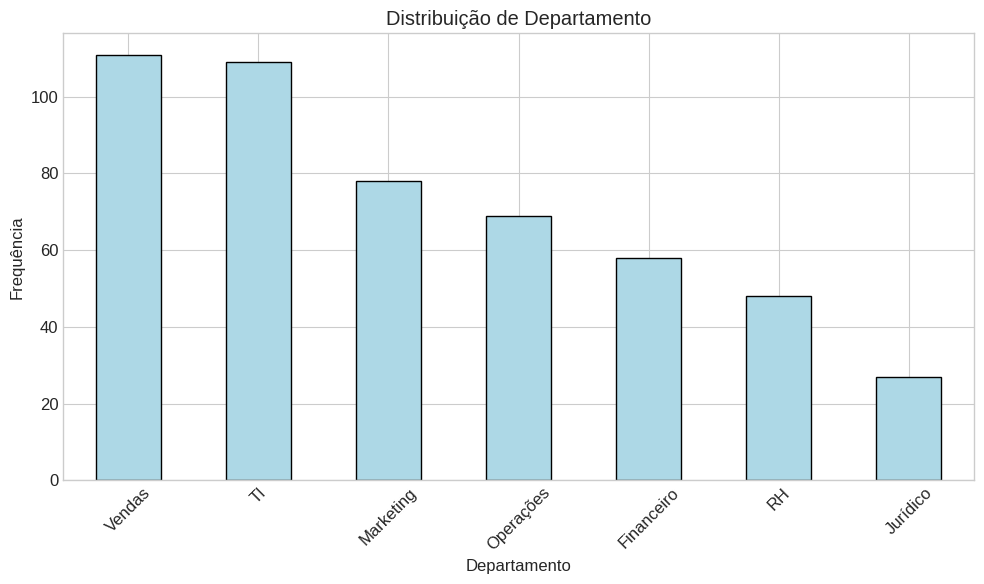


Cargo:
                             Contagem  Percentual
Cargo                                            
Coordenador de Marketing           26         5.2
Coordenador de Operações           26         5.2
Gerente de Vendas                  25         5.0
Vendedor Pleno                     24         4.8
Analista de Operações              23         4.6
Vendedor Jr                        23         4.6
Analista de Marketing Jr           22         4.4
Gerente de Operações               20         4.0
Vendedor Sr                        20         4.0
Coordenador de Vendas              19         3.8
Gerente de TI                      19         3.8
Desenvolvedor Sr                   17         3.4
Gerente de Marketing               17         3.4
Analista Financeiro Jr             16         3.2
Analista de RH Jr                  16         3.2
DevOps                             16         3.2
Gerente Financeiro                 16         3.2
QA Analyst                         15     

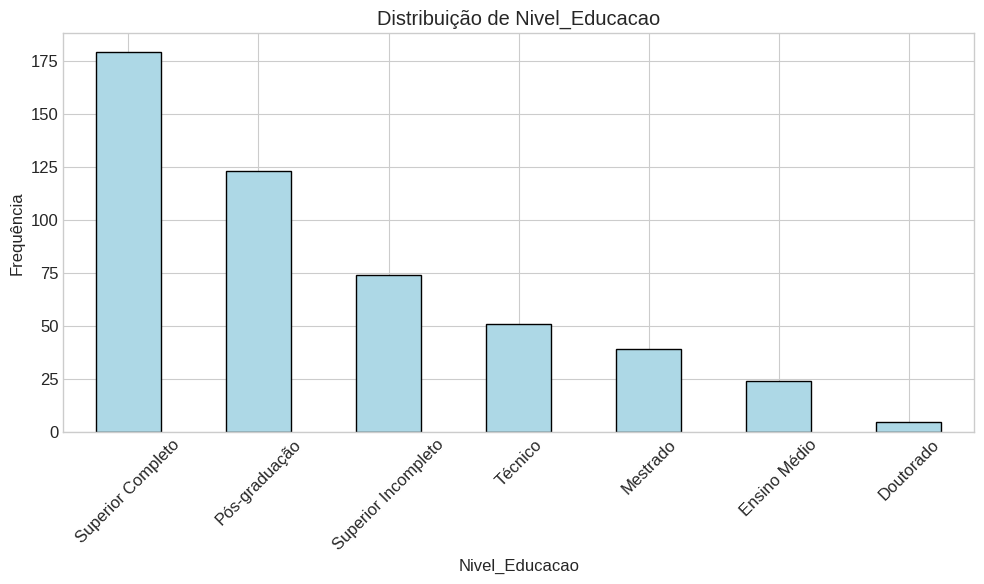


Estado_Civil:
               Contagem  Percentual
Estado_Civil                       
Casado(a)           210        42.0
Solteiro(a)         209        41.8
Divorciado(a)        64        12.8
Viúvo(a)             17         3.4


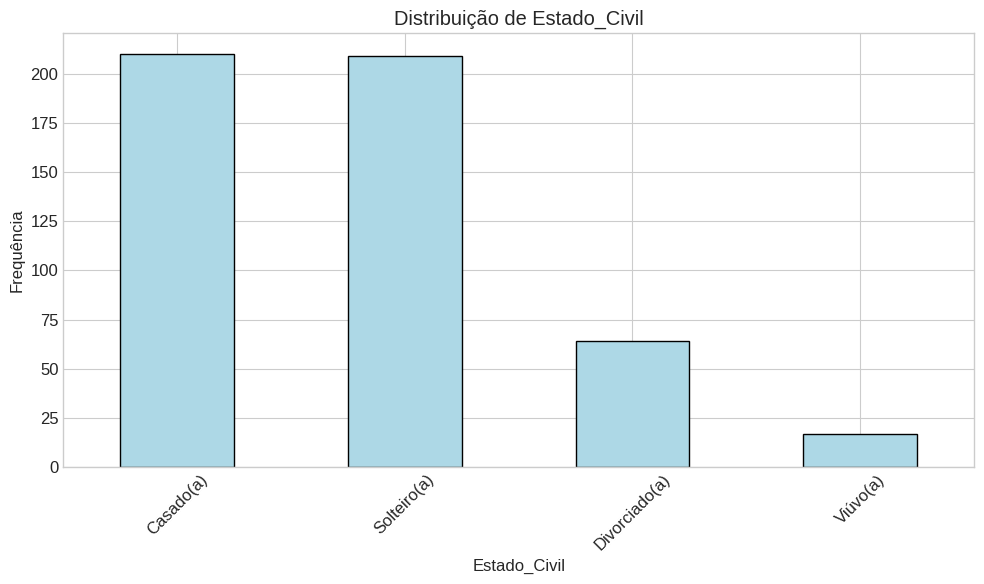


Tipo_Contrato:
               Contagem  Percentual
Tipo_Contrato                      
CLT                 347        69.4
PJ                  106        21.2
Estágio              26         5.2
Terceirizado         21         4.2


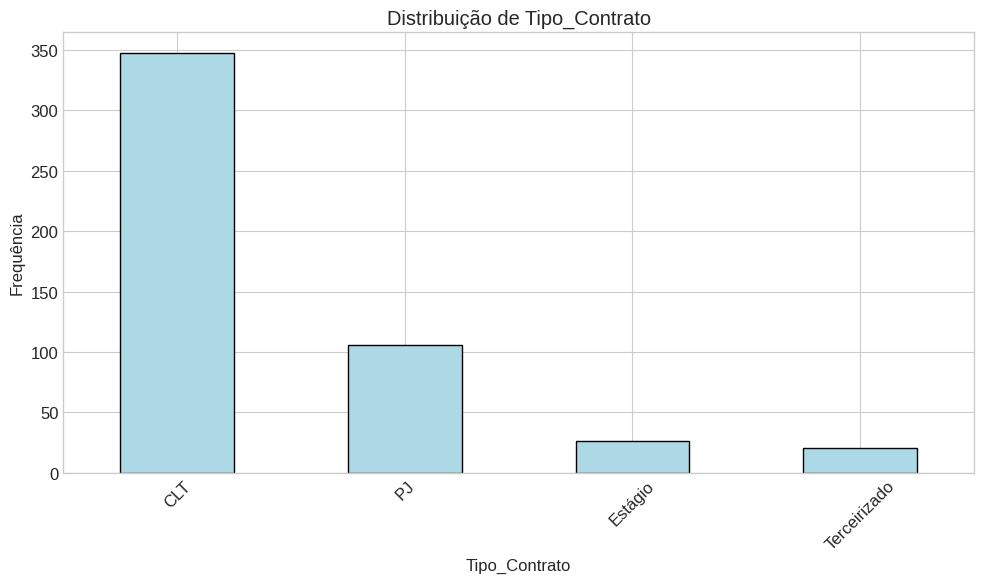

In [ ]:
# Identificando e analisando variáveis qualitativas
colunas_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Variáveis Qualitativas encontradas:")
for coluna in colunas_categoricas:
    print(f"- {coluna}")

if colunas_categoricas:
    print("\n" + "="*50)
    print("Análise das variáveis qualitativas:")

    for coluna in colunas_categoricas:
        print(f"\n{coluna}:")
        contagem = df[coluna].value_counts()
        percentual = df[coluna].value_counts(normalize=True) * 100

        resultado = pd.DataFrame({
            'Contagem': contagem,
            'Percentual': percentual
        })
        print(resultado)

        # Visualização
        if len(contagem) <= 10:  # Só plotar se não tiver muitas categorias
            plt.figure(figsize=(10, 6))
            contagem.plot(kind='bar', color='lightblue', edgecolor='black')
            plt.title(f'Distribuição de {coluna}')
            plt.xlabel(coluna)
            plt.ylabel('Frequência')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
else:
    print("Nenhuma variável qualitativa encontrada")

In [ ]:
# Verificando valores nulos
print("Contagem de valores nulos por coluna:")
valores_nulos = df.isnull().sum()
percentual_nulos = (df.isnull().sum() / len(df)) * 100

resultado_nulos = pd.DataFrame({
    'Valores_Nulos': valores_nulos,
    'Percentual': percentual_nulos
})

# Ordenar por quantidade de valores nulos
resultado_nulos = resultado_nulos.sort_values('Valores_Nulos', ascending=False)
print(resultado_nulos)

# Total de valores nulos no dataset
total_nulos = df.isnull().sum().sum()
total_valores = df.size
percentual_total_nulos = (total_nulos / total_valores) * 100

print(f"\nTotal de valores nulos no dataset: {total_nulos}")
print(f"Percentual total de valores nulos: {percentual_total_nulos:.2f}%")

Contagem de valores nulos por coluna:
                       Valores_Nulos  Percentual
Avaliacao_Performance             25         5.0
Satisfacao_Trabalho               15         3.0
Beneficios                        10         2.0
Nivel_Educacao                     5         1.0
ID_Funcionario                     0         0.0
Nome                               0         0.0
Idade                              0         0.0
Departamento                       0         0.0
Data_Admissao                      0         0.0
Tempo_Empresa_Meses                0         0.0
Salario                            0         0.0
Cargo                              0         0.0
Tipo_Contrato                      0         0.0
Estado_Civil                       0         0.0
Horas_Extras_Mes                   0         0.0
Faltas_Ultimo_Ano                  0         0.0

Total de valores nulos no dataset: 55
Percentual total de valores nulos: 0.69%


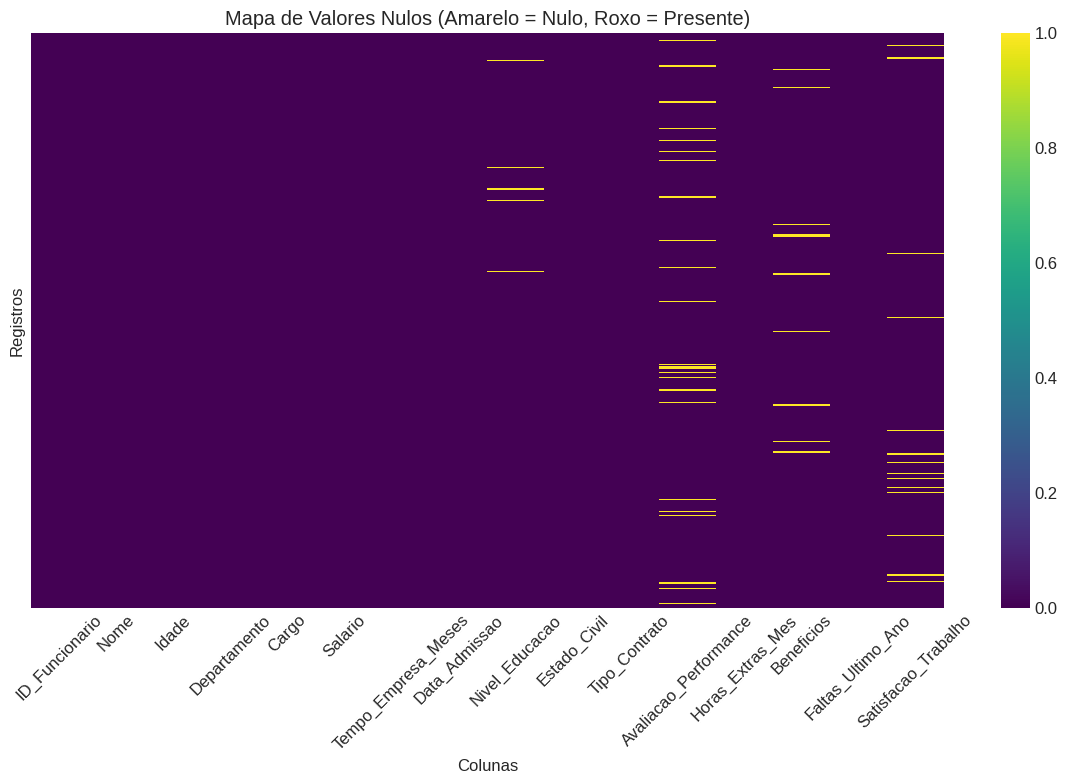

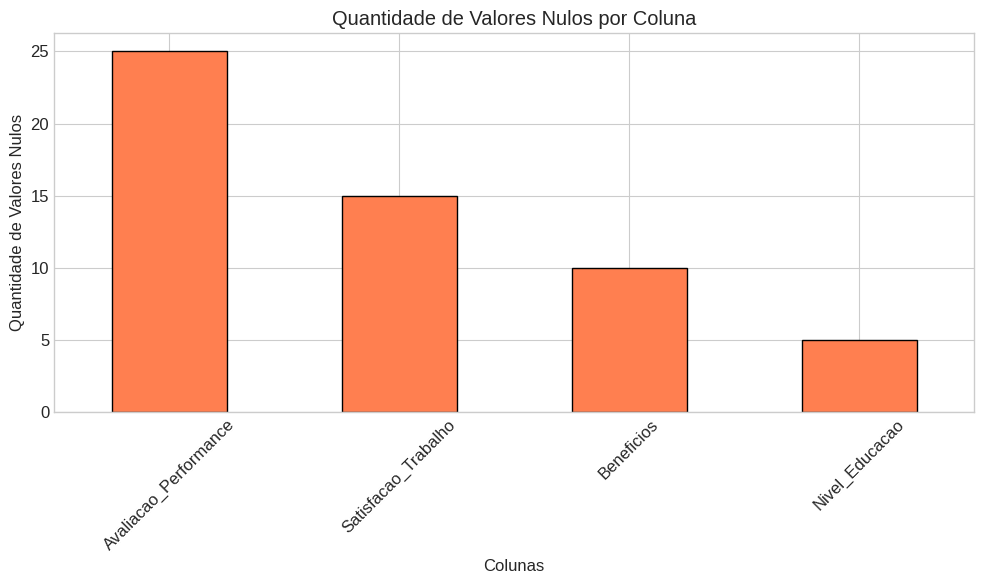

In [ ]:
# Visualizando padrões de valores nulos
if df.isnull().sum().sum() > 0:
    # Mapa de calor dos valores nulos
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
    plt.title('Mapa de Valores Nulos (Amarelo = Nulo, Roxo = Presente)')
    plt.xlabel('Colunas')
    plt.ylabel('Registros')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Gráfico de barras para valores nulos por coluna
    colunas_com_nulos = resultado_nulos[resultado_nulos['Valores_Nulos'] > 0]
    if not colunas_com_nulos.empty:
        plt.figure(figsize=(10, 6))
        colunas_com_nulos['Valores_Nulos'].plot(kind='bar', color='coral', edgecolor='black')
        plt.title('Quantidade de Valores Nulos por Coluna')
        plt.xlabel('Colunas')
        plt.ylabel('Quantidade de Valores Nulos')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
else:
    print("Não há valores nulos no dataset para visualizar.")

In [ ]:
# Estratégias para tratamento de valores nulos
df_tratado = df.copy()

print("Aplicando estratégias de tratamento de valores nulos:")

# 1. Remoção de linhas com muitos valores nulos
# Remove linhas onde mais de 50% dos valores são nulos
limite_nulos = len(df.columns) * 0.5
df_tratado = df_tratado.dropna(thresh=len(df.columns) - limite_nulos)
print(f"Linhas removidas por excesso de valores nulos: {len(df) - len(df_tratado)}")

# 2. Imputação por mediana para variáveis numéricas
colunas_numericas = df_tratado.select_dtypes(include=[np.number]).columns
for coluna in colunas_numericas:
    if df_tratado[coluna].isnull().sum() > 0:
        mediana = df_tratado[coluna].median()
        df_tratado[coluna].fillna(mediana, inplace=True)
        print(f"Coluna '{coluna}': {df[coluna].isnull().sum()} valores nulos substituídos pela mediana ({mediana:.2f})")

# 3. Imputação por moda para variáveis categóricas
colunas_categoricas = df_tratado.select_dtypes(include=['object', 'category']).columns
for coluna in colunas_categoricas:
    if df_tratado[coluna].isnull().sum() > 0:
        moda = df_tratado[coluna].mode().iloc[0] if not df_tratado[coluna].mode().empty else 'Não informado'
        df_tratado[coluna].fillna(moda, inplace=True)
        print(f"Coluna '{coluna}': {df[coluna].isnull().sum()} valores nulos substituídos pela moda ('{moda}')")

# Verificando se ainda existem valores nulos
print("\n" + "="*50)
print("Valores nulos após tratamento:")
print(df_tratado.isnull().sum())

if df_tratado.isnull().sum().sum() == 0:
    print("\n✅ Todos os valores nulos foram tratados com sucesso!")
else:
    print(f"\n⚠️  Ainda existem {df_tratado.isnull().sum().sum()} valores nulos no dataset.")

Aplicando estratégias de tratamento de valores nulos:
Linhas removidas por excesso de valores nulos: 0
Coluna 'Avaliacao_Performance': 25 valores nulos substituídos pela mediana (3.40)
Coluna 'Beneficios': 10 valores nulos substituídos pela mediana (814.49)
Coluna 'Satisfacao_Trabalho': 15 valores nulos substituídos pela mediana (7.00)
Coluna 'Nivel_Educacao': 5 valores nulos substituídos pela moda ('Superior Completo')

Valores nulos após tratamento:
ID_Funcionario           0
Nome                     0
Idade                    0
Departamento             0
Cargo                    0
Salario                  0
Tempo_Empresa_Meses      0
Data_Admissao            0
Nivel_Educacao           0
Estado_Civil             0
Tipo_Contrato            0
Avaliacao_Performance    0
Horas_Extras_Mes         0
Beneficios               0
Faltas_Ultimo_Ano        0
Satisfacao_Trabalho      0
dtype: int64

✅ Todos os valores nulos foram tratados com sucesso!


In [ ]:
# Exemplo de imputação mais sofisticada usando sklearn
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder

# Preparando dados para imputação avançada (apenas se houver valores nulos)
if df.isnull().sum().sum() > 0:
    print("Demonstrando técnicas avançadas de imputação:")

    # Separando variáveis numéricas e categóricas
    df_num = df.select_dtypes(include=[np.number])
    df_cat = df.select_dtypes(include=['object'])

    # 1. Imputação KNN para variáveis numéricas
    if not df_num.empty and df_num.isnull().sum().sum() > 0:
        print("\n1. Imputação KNN para variáveis numéricas:")
        imputer_knn = KNNImputer(n_neighbors=5)
        df_num_knn = pd.DataFrame(
            imputer_knn.fit_transform(df_num),
            columns=df_num.columns,
            index=df_num.index
        )
        print("Imputação KNN aplicada com sucesso")

    # 2. Imputação por frequência para variáveis categóricas
    if not df_cat.empty and df_cat.isnull().sum().sum() > 0:
        print("\n2. Imputação por frequência para variáveis categóricas:")
        imputer_cat = SimpleImputer(strategy='most_frequent')
        df_cat_imputed = pd.DataFrame(
            imputer_cat.fit_transform(df_cat),
            columns=df_cat.columns,
            index=df_cat.index
        )
        print("Imputação por frequência aplicada com sucesso")

    print("\n✅ Técnicas avançadas de imputação demonstradas!")
else:
    print("Não há valores nulos para demonstrar técnicas avançadas de imputação.")

Demonstrando técnicas avançadas de imputação:

1. Imputação KNN para variáveis numéricas:
Imputação KNN aplicada com sucesso

2. Imputação por frequência para variáveis categóricas:
Imputação por frequência aplicada com sucesso

✅ Técnicas avançadas de imputação demonstradas!


In [ ]:
# Função para detectar outliers usando Z-Score
def detectar_outliers_zscore(dados, limite=3):
    """
    Detecta outliers usando o método Z-Score

    Parâmetros:
    dados: Series - dados para análise
    limite: float - limite do Z-Score (padrão: 3)

    Retorna:
    dict: dicionário com informações sobre outliers
    """
    dados_limpos = dados.dropna()
    z_scores = np.abs(stats.zscore(dados_limpos))
    outliers_mask = z_scores > limite
    outliers = dados_limpos[outliers_mask]

    return {
        'outliers': outliers,
        'indices': outliers.index.tolist(),
        'z_scores': z_scores[outliers_mask],
        'quantidade': len(outliers),
        'percentual': (len(outliers) / len(dados_limpos)) * 100
    }

# Aplicando detecção de outliers para variáveis numéricas
colunas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

print("DETECÇÃO DE OUTLIERS - MÉTODO Z-SCORE")
print("="*50)

resultados_zscore = {}
for coluna in colunas_numericas:
    resultado = detectar_outliers_zscore(df[coluna])
    resultados_zscore[coluna] = resultado

    print(f"\n{coluna}:")
    print(f"  Outliers encontrados: {resultado['quantidade']}")
    print(f"  Percentual: {resultado['percentual']:.2f}%")

    if resultado['quantidade'] > 0:
        print(f"  Valores outliers: {resultado['outliers'].tolist()[:5]}{'...' if len(resultado['outliers']) > 5 else ''}")
        print(f"  Z-Scores correspondentes: {resultado['z_scores'][:5].tolist()}{'...' if len(resultado['z_scores']) > 5 else ''}")

DETECÇÃO DE OUTLIERS - MÉTODO Z-SCORE

ID_Funcionario:
  Outliers encontrados: 0
  Percentual: 0.00%

Idade:
  Outliers encontrados: 18
  Percentual: 3.60%
  Valores outliers: [65, 67, 66, 65, 65]...
  Z-Scores correspondentes: [3.045081250408257, 3.2533916383141444, 3.1492364443612004, 3.045081250408257, 3.045081250408257]...

Salario:
  Outliers encontrados: 2
  Percentual: 0.40%
  Valores outliers: [34134.45, 37988.03]
  Z-Scores correspondentes: [6.421019146931882, 7.359912742035122]

Tempo_Empresa_Meses:
  Outliers encontrados: 10
  Percentual: 2.00%
  Valores outliers: [113, 91, 114, 98, 113]...
  Z-Scores correspondentes: [4.033844473342787, 3.060810632573289, 4.078073284286855, 3.370412309181766, 4.033844473342787]...

Avaliacao_Performance:
  Outliers encontrados: 3
  Percentual: 0.63%
  Valores outliers: [1.0, 1.1, 1.1]
  Z-Scores correspondentes: [3.1739308311199332, 3.0431747908092683, 3.0431747908092683]

Horas_Extras_Mes:
  Outliers encontrados: 20
  Percentual: 4.00%
  V

In [ ]:
# Função para detectar outliers usando IQR
def detectar_outliers_iqr(dados):
    """
    Detecta outliers usando o método IQR (Intervalo Interquartil)

    Parâmetros:
    dados: Series - dados para análise

    Retorna:
    dict: dicionário com informações sobre outliers
    """
    dados_limpos = dados.dropna()
    Q1 = dados_limpos.quantile(0.25)
    Q3 = dados_limpos.quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers_mask = (dados_limpos < limite_inferior) | (dados_limpos > limite_superior)
    outliers = dados_limpos[outliers_mask]

    return {
        'outliers': outliers,
        'indices': outliers.index.tolist(),
        'quantidade': len(outliers),
        'percentual': (len(outliers) / len(dados_limpos)) * 100,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'limite_inferior': limite_inferior,
        'limite_superior': limite_superior
    }

# Aplicando detecção de outliers IQR
print("\nDETECÇÃO DE OUTLIERS - MÉTODO IQR")
print("="*50)

resultados_iqr = {}
for coluna in colunas_numericas:
    resultado = detectar_outliers_iqr(df[coluna])
    resultados_iqr[coluna] = resultado

    print(f"\n{coluna}:")
    print(f"  Q1: {resultado['Q1']:.2f}")
    print(f"  Q3: {resultado['Q3']:.2f}")
    print(f"  IQR: {resultado['IQR']:.2f}")
    print(f"  Limite inferior: {resultado['limite_inferior']:.2f}")
    print(f"  Limite superior: {resultado['limite_superior']:.2f}")
    print(f"  Outliers encontrados: {resultado['quantidade']}")
    print(f"  Percentual: {resultado['percentual']:.2f}%")

    if resultado['quantidade'] > 0:
        print(f"  Valores outliers: {resultado['outliers'].tolist()[:5]}{'...' if len(resultado['outliers']) > 5 else ''}")


DETECÇÃO DE OUTLIERS - MÉTODO IQR

ID_Funcionario:
  Q1: 125.75
  Q3: 375.25
  IQR: 249.50
  Limite inferior: -248.50
  Limite superior: 749.50
  Outliers encontrados: 0
  Percentual: 0.00%

Idade:
  Q1: 29.00
  Q3: 41.00
  IQR: 12.00
  Limite inferior: 11.00
  Limite superior: 59.00
  Outliers encontrados: 20
  Percentual: 4.00%
  Valores outliers: [65, 67, 66, 65, 65]...

Salario:
  Q1: 4446.79
  Q3: 9846.42
  IQR: 5399.64
  Limite inferior: -3652.67
  Limite superior: 17945.88
  Outliers encontrados: 5
  Percentual: 1.00%
  Valores outliers: [34134.45, 19770.45, 18264.59, 37988.03, 18551.99]

Tempo_Empresa_Meses:
  Q1: 5.00
  Q3: 30.00
  IQR: 25.00
  Limite inferior: -32.50
  Limite superior: 67.50
  Outliers encontrados: 28
  Percentual: 5.60%
  Valores outliers: [85, 113, 82, 91, 69]...

Avaliacao_Performance:
  Q1: 2.90
  Q3: 3.90
  IQR: 1.00
  Limite inferior: 1.40
  Limite superior: 5.40
  Outliers encontrados: 4
  Percentual: 0.84%
  Valores outliers: [1.0, 1.2, 1.1, 1.1]

Ho

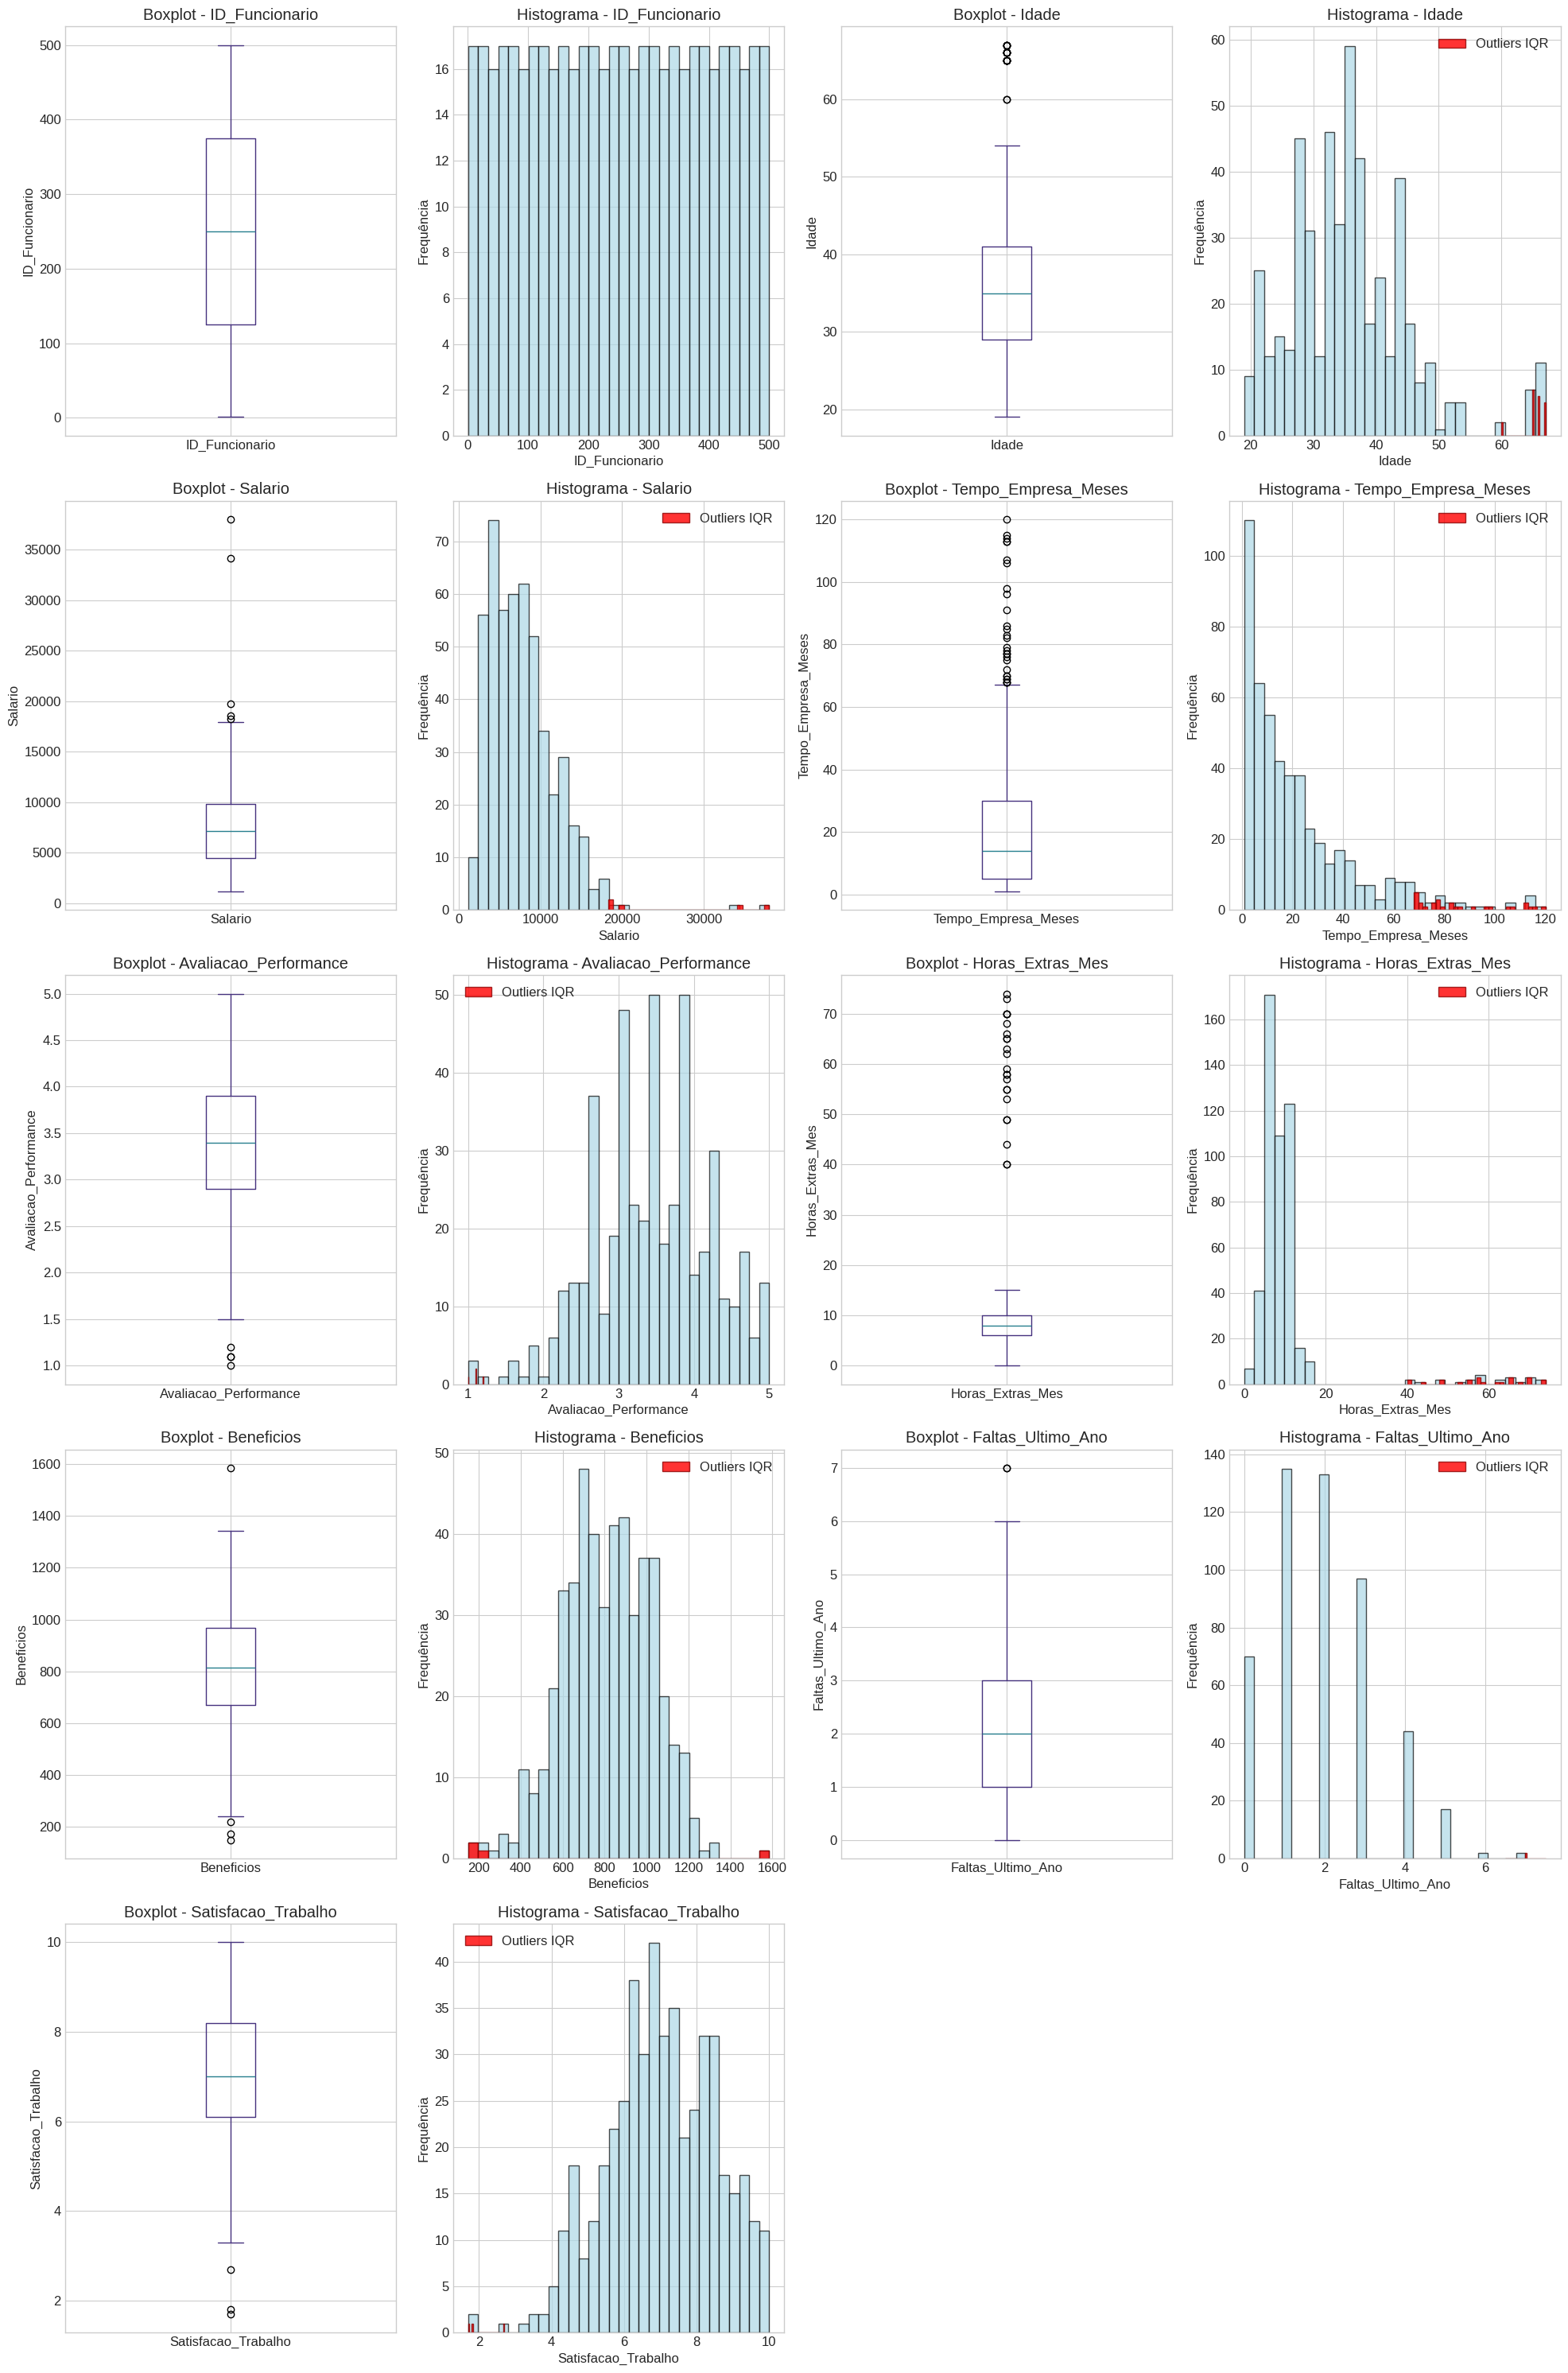

In [ ]:
# Visualizando outliers para cada variável numérica
if colunas_numericas:
    n_cols = min(2, len(colunas_numericas))
    n_rows = (len(colunas_numericas) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols * 2, figsize=(20, 6 * n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)

    for i, coluna in enumerate(colunas_numericas):
        row = i // n_cols
        col_box = (i % n_cols) * 2
        col_hist = col_box + 1

        # Boxplot
        if n_rows > 1:
            ax_box = axes[row, col_box]
            ax_hist = axes[row, col_hist]
        else:
            ax_box = axes[col_box]
            ax_hist = axes[col_hist]

        # Boxplot
        df[coluna].dropna().plot(kind='box', ax=ax_box)
        ax_box.set_title(f'Boxplot - {coluna}')
        ax_box.set_ylabel(coluna)

        # Histograma com outliers destacados
        dados_limpos = df[coluna].dropna()
        ax_hist.hist(dados_limpos, bins=30, alpha=0.7, color='lightblue', edgecolor='black')

        # Destacar outliers IQR
        if coluna in resultados_iqr:
            outliers_iqr = resultados_iqr[coluna]['outliers']
            if len(outliers_iqr) > 0:
                ax_hist.hist(outliers_iqr, bins=30, alpha=0.8, color='red', edgecolor='darkred', label='Outliers IQR')

        ax_hist.set_title(f'Histograma - {coluna}')
        ax_hist.set_xlabel(coluna)
        ax_hist.set_ylabel('Frequência')
        ax_hist.legend()

    # Remover subplots vazios
    for i in range(len(colunas_numericas), n_rows * n_cols):
        row = i // n_cols
        col_box = (i % n_cols) * 2
        col_hist = col_box + 1

        if n_rows > 1:
            fig.delaxes(axes[row, col_box])
            fig.delaxes(axes[row, col_hist])
        else:
            if col_box < len(axes):
                fig.delaxes(axes[col_box])
            if col_hist < len(axes):
                fig.delaxes(axes[col_hist])

    plt.tight_layout()
    plt.show()
else:
    print("Nenhuma variável numérica encontrada para visualização de outliers.")

COMPARAÇÃO DOS MÉTODOS DE DETECÇÃO DE OUTLIERS
                  Coluna  Z-Score  IQR  Diferença
0         ID_Funcionario        0    0          0
1                  Idade       18   20          2
2                Salario        2    5          3
3    Tempo_Empresa_Meses       10   28         18
4  Avaliacao_Performance        3    4          1
5       Horas_Extras_Mes       20   23          3
6             Beneficios        3    4          1
7      Faltas_Ultimo_Ano        2    2          0
8    Satisfacao_Trabalho        2    3          1


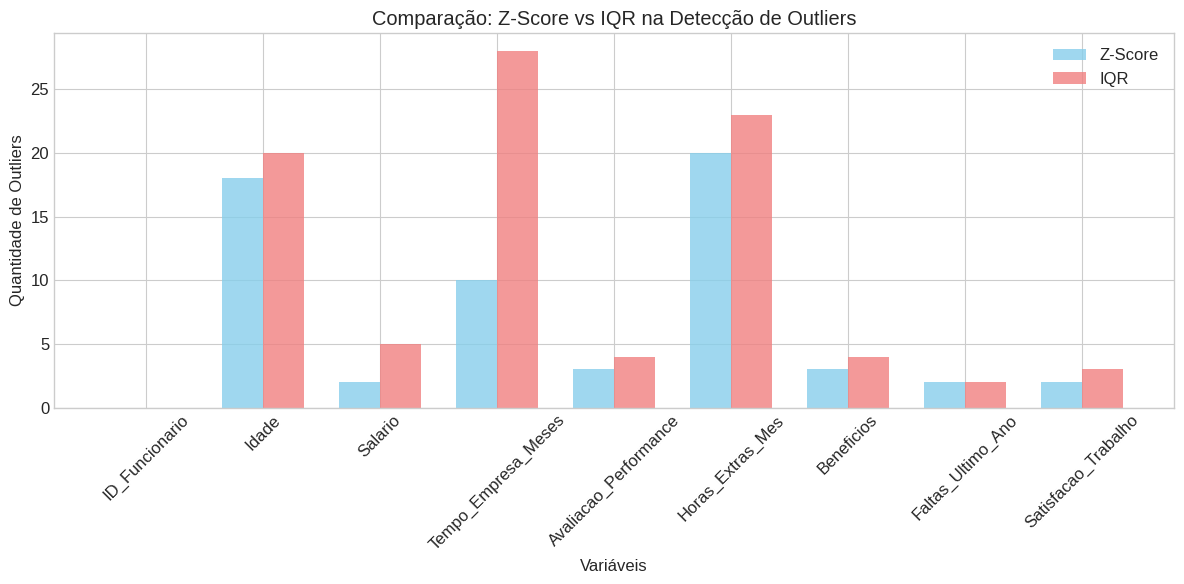

In [ ]:
# Comparando os métodos Z-Score e IQR
print("COMPARAÇÃO DOS MÉTODOS DE DETECÇÃO DE OUTLIERS")
print("="*60)

comparacao = []
for coluna in colunas_numericas:
    zscore_count = resultados_zscore[coluna]['quantidade']
    iqr_count = resultados_iqr[coluna]['quantidade']

    comparacao.append({
        'Coluna': coluna,
        'Z-Score': zscore_count,
        'IQR': iqr_count,
        'Diferença': abs(zscore_count - iqr_count)
    })

df_comparacao = pd.DataFrame(comparacao)
print(df_comparacao)

# Visualização da comparação
if not df_comparacao.empty:
    plt.figure(figsize=(12, 6))
    x = np.arange(len(df_comparacao))
    width = 0.35

    plt.bar(x - width/2, df_comparacao['Z-Score'], width, label='Z-Score', alpha=0.8, color='skyblue')
    plt.bar(x + width/2, df_comparacao['IQR'], width, label='IQR', alpha=0.8, color='lightcoral')

    plt.xlabel('Variáveis')
    plt.ylabel('Quantidade de Outliers')
    plt.title('Comparação: Z-Score vs IQR na Detecção de Outliers')
    plt.xticks(x, df_comparacao['Coluna'], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

ESTRATÉGIAS DE TRATAMENTO DE OUTLIERS
Demonstrando tratamento de outliers para a coluna: ID_Funcionario
Dados originais: 500 valores

1. REMOÇÃO DE OUTLIERS (método IQR):
  Outliers removidos: 0
  Dados restantes: 500
  Média original: 250.50
  Média após remoção: 250.50

2. TRUNCAMENTO (CAPPING):
  Valores truncados: 0
  Limite inferior aplicado: -248.50
  Limite superior aplicado: 749.50
  Média original: 250.50
  Média após truncamento: 250.50

3. TRANSFORMAÇÃO LOGARÍTMICA:
  Outliers antes da transformação: 0
  Outliers após transformação log: 24
  Assimetria original: 0.000
  Assimetria após log: -1.792

4. VISUALIZAÇÃO COMPARATIVA:


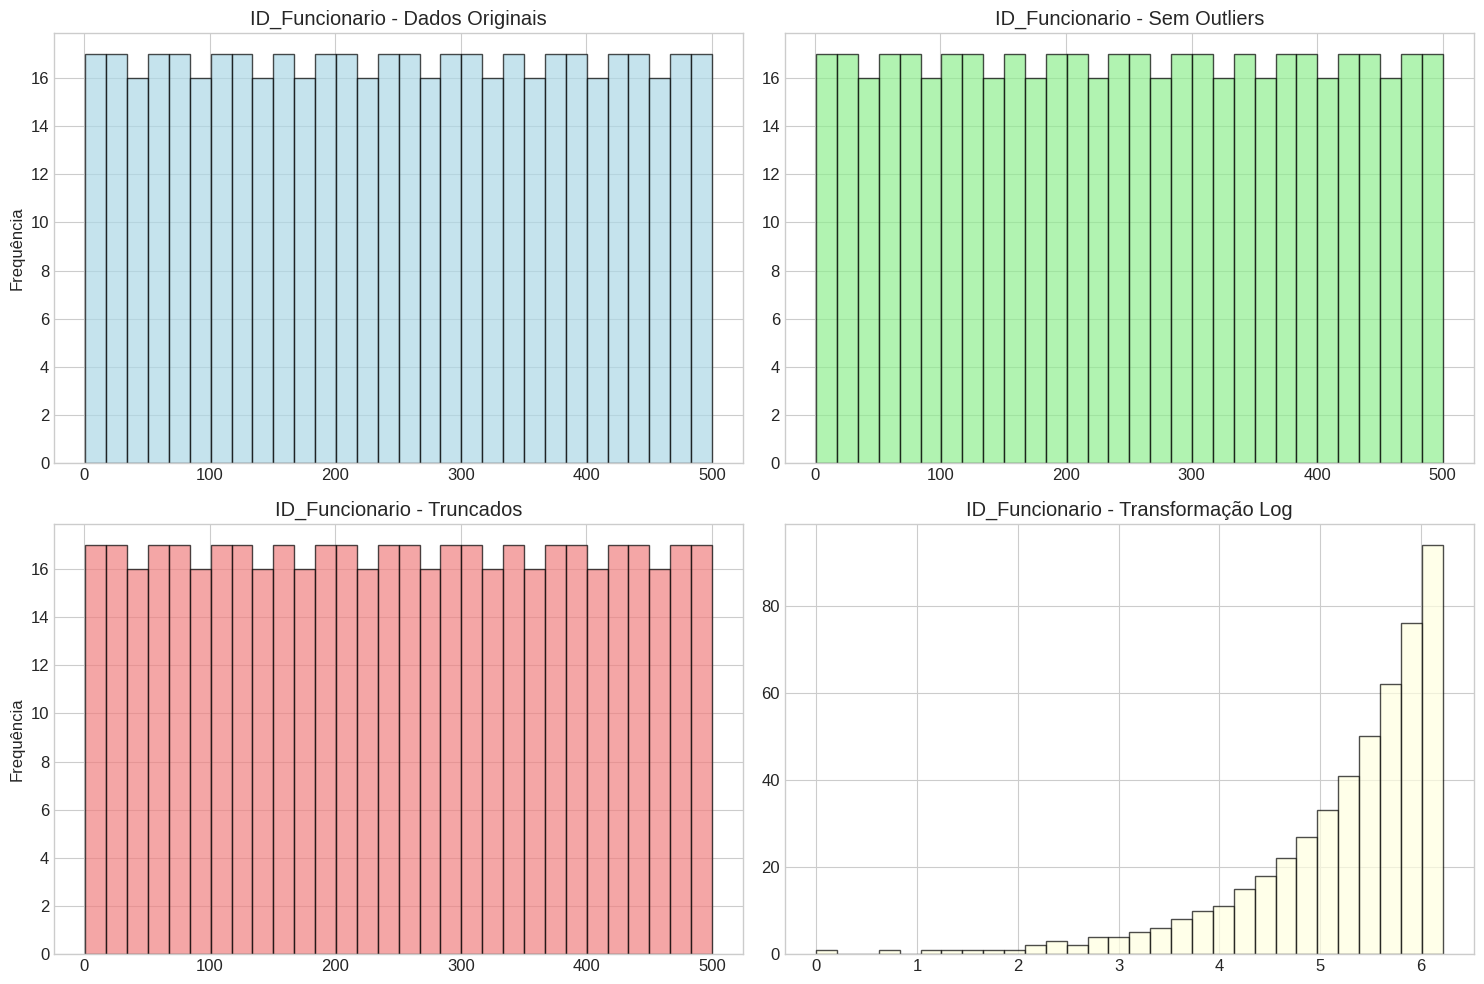

In [ ]:
# Estratégias para tratamento de outliers
print("ESTRATÉGIAS DE TRATAMENTO DE OUTLIERS")
print("="*50)

# Escolhendo uma coluna para demonstrar o tratamento (primeira coluna numérica)
if colunas_numericas:
    coluna_exemplo = colunas_numericas[0]
    dados_originais = df[coluna_exemplo].dropna()

    print(f"Demonstrando tratamento de outliers para a coluna: {coluna_exemplo}")
    print(f"Dados originais: {len(dados_originais)} valores")

    # 1. REMOÇÃO DE OUTLIERS
    print("\n1. REMOÇÃO DE OUTLIERS (método IQR):")
    resultado_iqr_exemplo = resultados_iqr[coluna_exemplo]

    # Dados sem outliers
    mask_sem_outliers = ~dados_originais.index.isin(resultado_iqr_exemplo['indices'])
    dados_sem_outliers = dados_originais[mask_sem_outliers]

    print(f"  Outliers removidos: {len(dados_originais) - len(dados_sem_outliers)}")
    print(f"  Dados restantes: {len(dados_sem_outliers)}")
    print(f"  Média original: {dados_originais.mean():.2f}")
    print(f"  Média após remoção: {dados_sem_outliers.mean():.2f}")

    # 2. TRUNCAMENTO (CAPPING)
    print("\n2. TRUNCAMENTO (CAPPING):")
    dados_truncados = dados_originais.copy()

    limite_inf = resultado_iqr_exemplo['limite_inferior']
    limite_sup = resultado_iqr_exemplo['limite_superior']

    # Aplicar truncamento
    dados_truncados = np.where(
        dados_truncados > limite_sup, limite_sup,
        np.where(dados_truncados < limite_inf, limite_inf, dados_truncados)
    )

    outliers_truncados = np.sum((dados_originais > limite_sup) | (dados_originais < limite_inf))
    print(f"  Valores truncados: {outliers_truncados}")
    print(f"  Limite inferior aplicado: {limite_inf:.2f}")
    print(f"  Limite superior aplicado: {limite_sup:.2f}")
    print(f"  Média original: {dados_originais.mean():.2f}")
    print(f"  Média após truncamento: {np.mean(dados_truncados):.2f}")

    # 3. TRANSFORMAÇÃO LOGARÍTMICA
    print("\n3. TRANSFORMAÇÃO LOGARÍTMICA:")
    # Aplicar apenas se todos os valores forem positivos
    if dados_originais.min() > 0:
        dados_log = np.log(dados_originais)
        outliers_log = detectar_outliers_iqr(pd.Series(dados_log))

        print(f"  Outliers antes da transformação: {resultado_iqr_exemplo['quantidade']}")
        print(f"  Outliers após transformação log: {outliers_log['quantidade']}")
        print(f"  Assimetria original: {dados_originais.skew():.3f}")
        print(f"  Assimetria após log: {pd.Series(dados_log).skew():.3f}")
    else:
        print("  Transformação logarítmica não aplicável (valores negativos ou zero presentes)")

    # VISUALIZAÇÃO COMPARATIVA
    print("\n4. VISUALIZAÇÃO COMPARATIVA:")
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Dados originais
    axes[0, 0].hist(dados_originais, bins=30, alpha=0.7, color='lightblue', edgecolor='black')
    axes[0, 0].set_title(f'{coluna_exemplo} - Dados Originais')
    axes[0, 0].set_ylabel('Frequência')

    # Dados sem outliers
    axes[0, 1].hist(dados_sem_outliers, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0, 1].set_title(f'{coluna_exemplo} - Sem Outliers')

    # Dados truncados
    axes[1, 0].hist(dados_truncados, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[1, 0].set_title(f'{coluna_exemplo} - Truncados')
    axes[1, 0].set_ylabel('Frequência')

    # Transformação logarítmica (se aplicável)
    if dados_originais.min() > 0:
        axes[1, 1].hist(dados_log, bins=30, alpha=0.7, color='lightyellow', edgecolor='black')
        axes[1, 1].set_title(f'{coluna_exemplo} - Transformação Log')
    else:
        axes[1, 1].text(0.5, 0.5, 'Transformação Log\nnão aplicável',
                        ha='center', va='center', transform=axes[1, 1].transAxes, fontsize=12)
        axes[1, 1].set_title(f'{coluna_exemplo} - Transformação Log')

    plt.tight_layout()
    plt.show()

else:
    print("Nenhuma variável numérica encontrada para demonstrar tratamento de outliers.")

In [ ]:
# Função completa para tratamento de outliers
def tratar_outliers(df, metodo='iqr', estrategia='truncamento', colunas=None):
    """
    Função completa para tratamento de outliers

    Parâmetros:
    df: DataFrame - dados para tratamento
    metodo: str - método de detecção ('iqr' ou 'zscore')
    estrategia: str - estratégia de tratamento ('remocao', 'truncamento', 'log')
    colunas: list - colunas específicas para tratar (None = todas numéricas)

    Retorna:
    DataFrame: dados tratados
    dict: relatório do tratamento
    """
    df_tratado = df.copy()
    relatorio = {}

    # Definir colunas a serem tratadas
    if colunas is None:
        colunas = df_tratado.select_dtypes(include=[np.number]).columns.tolist()

    for coluna in colunas:
        if coluna not in df_tratado.columns:
            continue

        dados_originais = df_tratado[coluna].dropna()

        # Detectar outliers
        if metodo == 'iqr':
            resultado_outliers = detectar_outliers_iqr(dados_originais)
        else:  # zscore
            resultado_outliers = detectar_outliers_zscore(dados_originais)

        outliers_count = resultado_outliers['quantidade']

        if outliers_count == 0:
            relatorio[coluna] = {'outliers_originais': 0, 'acao': 'nenhuma'}
            continue

        # Aplicar estratégia de tratamento
        if estrategia == 'remocao':
            # Remover linhas com outliers
            indices_outliers = resultado_outliers['indices']
            df_tratado = df_tratado.drop(indices_outliers)
            acao = f"Removidas {len(indices_outliers)} linhas"

        elif estrategia == 'truncamento':
            # Truncar valores extremos
            if metodo == 'iqr':
                limite_inf = resultado_outliers['limite_inferior']
                limite_sup = resultado_outliers['limite_superior']
            else:  # zscore
                limite_inf = dados_originais.mean() - 3 * dados_originais.std()
                limite_sup = dados_originais.mean() + 3 * dados_originais.std()

            df_tratado[coluna] = np.where(
                df_tratado[coluna] > limite_sup, limite_sup,
                np.where(df_tratado[coluna] < limite_inf, limite_inf, df_tratado[coluna])
            )
            acao = f"Truncamento aplicado (limites: {limite_inf:.2f} - {limite_sup:.2f})"

        elif estrategia == 'log' and dados_originais.min() > 0:
            # Transformação logarítmica
            df_tratado[coluna] = np.log(df_tratado[coluna])
            acao = "Transformação logarítmica aplicada"

        else:
            acao = "Estratégia não aplicável"

        relatorio[coluna] = {
            'outliers_originais': outliers_count,
            'acao': acao,
            'metodo': metodo,
            'estrategia': estrategia
        }

    return df_tratado, relatorio

# Exemplo de uso da função
print("EXEMPLO DE USO DA FUNÇÃO COMPLETA:")
print("="*50)

# Aplicar truncamento usando IQR
df_exemplo_tratado, relatorio_exemplo = tratar_outliers(
    df,
    metodo='iqr',
    estrategia='truncamento'
)

print("Relatório do tratamento:")
for coluna, info in relatorio_exemplo.items():
    print(f"\n{coluna}:")
    print(f"  Outliers originais: {info['outliers_originais']}")
    print(f"  Ação realizada: {info['acao']}")

print(f"\nDimensões originais: {df.shape}")
print(f"Dimensões após tratamento: {df_exemplo_tratado.shape}")

EXEMPLO DE USO DA FUNÇÃO COMPLETA:
Relatório do tratamento:

ID_Funcionario:
  Outliers originais: 0
  Ação realizada: nenhuma

Idade:
  Outliers originais: 20
  Ação realizada: Truncamento aplicado (limites: 11.00 - 59.00)

Salario:
  Outliers originais: 5
  Ação realizada: Truncamento aplicado (limites: -3652.67 - 17945.88)

Tempo_Empresa_Meses:
  Outliers originais: 28
  Ação realizada: Truncamento aplicado (limites: -32.50 - 67.50)

Avaliacao_Performance:
  Outliers originais: 4
  Ação realizada: Truncamento aplicado (limites: 1.40 - 5.40)

Horas_Extras_Mes:
  Outliers originais: 23
  Ação realizada: Truncamento aplicado (limites: 0.00 - 16.00)

Beneficios:
  Outliers originais: 4
  Ação realizada: Truncamento aplicado (limites: 221.51 - 1415.52)

Faltas_Ultimo_Ano:
  Outliers originais: 2
  Ação realizada: Truncamento aplicado (limites: -2.00 - 6.00)

Satisfacao_Trabalho:
  Outliers originais: 3
  Ação realizada: Truncamento aplicado (limites: 2.95 - 11.35)

Dimensões originais: (

In [ ]:
# Exemplo de análise completa aplicando todos os conceitos
print("ANÁLISE COMPLETA - EXEMPLO PRÁTICO")
print("="*50)

# 1. Carregamento e exploração inicial
print("1. EXPLORAÇÃO INICIAL:")
print(f"   Dataset shape: {df.shape}")
print(f"   Colunas: {list(df.columns)}")
print(f"   Tipos de dados: {df.dtypes.value_counts().to_dict()}")

# 2. Análise de valores nulos
print("\n2. ANÁLISE DE VALORES NULOS:")
total_nulos = df.isnull().sum().sum()
print(f"   Total de valores nulos: {total_nulos}")
if total_nulos > 0:
    colunas_com_nulos = df.isnull().sum()[df.isnull().sum() > 0]
    print(f"   Colunas com valores nulos: {colunas_com_nulos.to_dict()}")

# 3. Análise de outliers
print("\n3. ANÁLISE DE OUTLIERS:")
total_outliers_iqr = sum([resultados_iqr[col]['quantidade'] for col in colunas_numericas])
total_outliers_zscore = sum([resultados_zscore[col]['quantidade'] for col in colunas_numericas])
print(f"   Total de outliers (IQR): {total_outliers_iqr}")
print(f"   Total de outliers (Z-Score): {total_outliers_zscore}")

# 4. Estatísticas descritivas principais
print("\n4. ESTATÍSTICAS DESCRITIVAS PRINCIPAIS:")
for coluna in colunas_numericas:
    dados = df[coluna].dropna()
    print(f"   {coluna}:")
    print(f"     Média: {dados.mean():.2f}")
    print(f"     Mediana: {dados.median():.2f}")
    print(f"     Desvio Padrão: {dados.std():.2f}")
    print(f"     Assimetria: {dados.skew():.3f}")

# 5. Recomendações finais
print("\n5. RECOMENDAÇÕES:")
recomendacoes = []

if total_nulos > 0:
    recomendacoes.append("Tratar valores nulos antes da análise")

if total_outliers_iqr > 0:
    recomendacoes.append("Investigar e tratar outliers identificados")

for coluna in colunas_numericas:
    assimetria = df[coluna].dropna().skew()
    if abs(assimetria) > 1:
        recomendacoes.append(f"Considerar transformação para {coluna} (assimetria alta: {assimetria:.2f})")

if recomendacoes:
    for i, rec in enumerate(recomendacoes, 1):
        print(f"   {i}. {rec}")
else:
    print("   Os dados estão em boas condições para análise!")

print("\n" + "="*50)
print("ANÁLISE COMPLETA FINALIZADA!")
print("="*50)

ANÁLISE COMPLETA - EXEMPLO PRÁTICO
1. EXPLORAÇÃO INICIAL:
   Dataset shape: (500, 16)
   Colunas: ['ID_Funcionario', 'Nome', 'Idade', 'Departamento', 'Cargo', 'Salario', 'Tempo_Empresa_Meses', 'Data_Admissao', 'Nivel_Educacao', 'Estado_Civil', 'Tipo_Contrato', 'Avaliacao_Performance', 'Horas_Extras_Mes', 'Beneficios', 'Faltas_Ultimo_Ano', 'Satisfacao_Trabalho']
   Tipos de dados: {dtype('O'): 7, dtype('int64'): 5, dtype('float64'): 4}

2. ANÁLISE DE VALORES NULOS:
   Total de valores nulos: 55
   Colunas com valores nulos: {'Nivel_Educacao': 5, 'Avaliacao_Performance': 25, 'Beneficios': 10, 'Satisfacao_Trabalho': 15}

3. ANÁLISE DE OUTLIERS:
   Total de outliers (IQR): 89
   Total de outliers (Z-Score): 60

4. ESTATÍSTICAS DESCRITIVAS PRINCIPAIS:
   ID_Funcionario:
     Média: 250.50
     Mediana: 250.50
     Desvio Padrão: 144.48
     Assimetria: 0.000
   Idade:
     Média: 35.76
     Mediana: 35.00
     Desvio Padrão: 9.61
     Assimetria: 1.013
   Salario:
     Média: 7780.12
     M

In [ ]:
print("CÓDIGOS ESSENCIAIS PARA ANÁLISE DE DADOS")
print("="*50)

print("""
1. EXPLORAÇÃO INICIAL:
   df.head()                    # Primeiras linhas
   df.info()                    # Informações gerais
   df.describe()                # Estatísticas descritivas
   df.shape                     # Dimensões
   df.dtypes                    # Tipos de dados

2. VALORES NULOS:
   df.isnull().sum()            # Contagem de nulos
   df.dropna()                  # Remover nulos
   df.fillna(valor)             # Preencher nulos
   df.fillna(df.mean())         # Preencher com média
   df.fillna(df.mode().iloc[0]) # Preencher com moda

3. OUTLIERS (IQR):
   Q1 = df['col'].quantile(0.25)
   Q3 = df['col'].quantile(0.75)
   IQR = Q3 - Q1
   limite_inf = Q1 - 1.5 * IQR
   limite_sup = Q3 + 1.5 * IQR
   outliers = df[(df['col'] < limite_inf) | (df['col'] > limite_sup)]

4. OUTLIERS (Z-SCORE):
   from scipy import stats
   z_scores = np.abs(stats.zscore(df['col']))
   outliers = df[z_scores > 3]

5. VISUALIZAÇÕES:
   df['col'].hist()             # Histograma
   df.boxplot()                 # Boxplot
   sns.heatmap(df.corr())       # Matriz de correlação
   sns.scatterplot(x, y)        # Gráfico de dispersão

6. TRANSFORMAÇÕES:
   np.log(df['col'])            # Transformação logarítmica
   np.sqrt(df['col'])           # Transformação raiz quadrada
   df['col'].astype('category') # Converter para categórico
   pd.to_datetime(df['col'])    # Converter para datetime
""")

print("\nEste notebook contém todos os códigos apresentados nos slides!")
print("Use-o como referência para suas análises de dados.")

CÓDIGOS ESSENCIAIS PARA ANÁLISE DE DADOS

1. EXPLORAÇÃO INICIAL:
   df.head()                    # Primeiras linhas
   df.info()                    # Informações gerais
   df.describe()                # Estatísticas descritivas
   df.shape                     # Dimensões
   df.dtypes                    # Tipos de dados

2. VALORES NULOS:
   df.isnull().sum()            # Contagem de nulos
   df.dropna()                  # Remover nulos
   df.fillna(valor)             # Preencher nulos
   df.fillna(df.mean())         # Preencher com média
   df.fillna(df.mode().iloc[0]) # Preencher com moda

3. OUTLIERS (IQR):
   Q1 = df['col'].quantile(0.25)
   Q3 = df['col'].quantile(0.75)
   IQR = Q3 - Q1
   limite_inf = Q1 - 1.5 * IQR
   limite_sup = Q3 + 1.5 * IQR
   outliers = df[(df['col'] < limite_inf) | (df['col'] > limite_sup)]

4. OUTLIERS (Z-SCORE):
   from scipy import stats
   z_scores = np.abs(stats.zscore(df['col']))
   outliers = df[z_scores > 3]

5. VISUALIZAÇÕES:
   df['col'].hist()  